Name:HARSHIT RAJ TANEJA
Reg No:24MSP3066
Assignment 2.2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [5]:
# Load the dataset
df = pd.read_csv('energy_efficiency_data.csv')

# --- 1. Data Preprocessing ---
# EDA
print("--- Exploratory Data Analysis (EDA) ---")
print("\nDataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum()) # There are no missing values


--- Exploratory Data Analysis (EDA) ---

Dataset Head:
   Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing_Area  Glazing_Area_Distribution  Heating_Load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0                          0         20.84   

   Cooling_Load  
0         21.

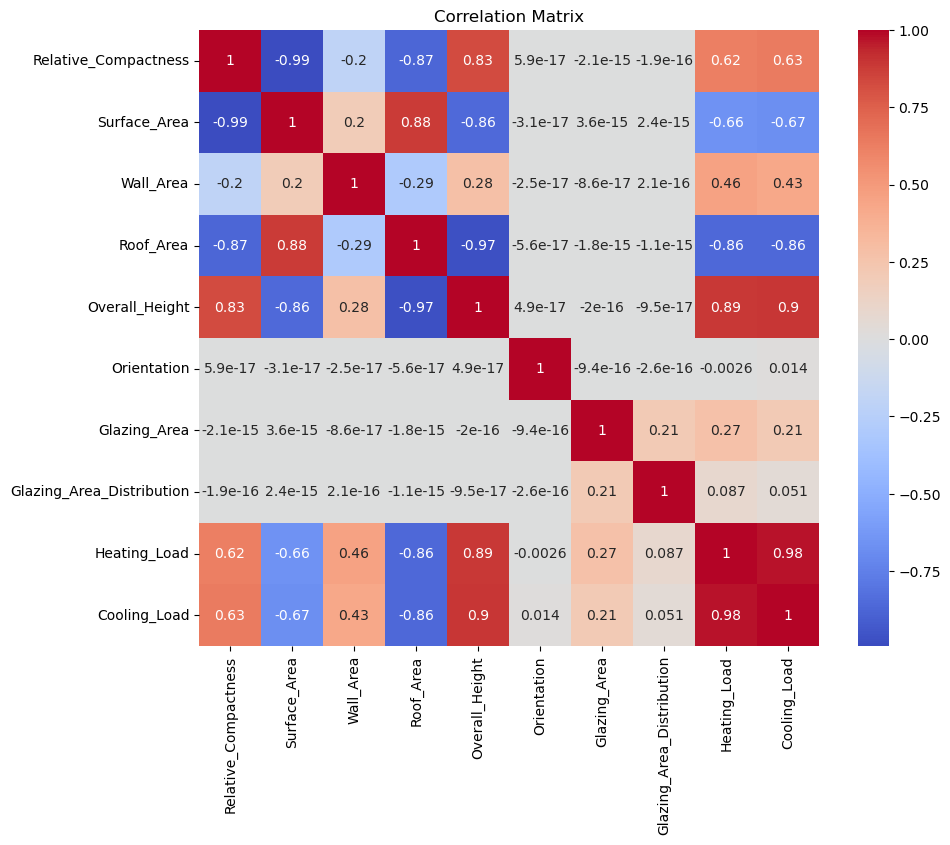

In [7]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Standardize features (except for target variables)
features_to_standardize = df.columns.drop(['Heating_Load', 'Cooling_Load'])
scaler = StandardScaler()
df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])

print("\nStandardized Features:")
print(df.head())


Standardized Features:
   Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0              2.041777     -1.785875  -0.561951  -1.470077             1.0   
1              2.041777     -1.785875  -0.561951  -1.470077             1.0   
2              2.041777     -1.785875  -0.561951  -1.470077             1.0   
3              2.041777     -1.785875  -0.561951  -1.470077             1.0   
4              1.284979     -1.229239   0.000000  -1.198678             1.0   

   Orientation  Glazing_Area  Glazing_Area_Distribution  Heating_Load  \
0    -1.341641     -1.760447                  -1.814575         15.55   
1    -0.447214     -1.760447                  -1.814575         15.55   
2     0.447214     -1.760447                  -1.814575         15.55   
3     1.341641     -1.760447                  -1.814575         15.55   
4    -1.341641     -1.760447                  -1.814575         20.84   

   Cooling_Load  
0         21.33  
1         21.33  
2       

In [11]:
# Prepare data
X = df.drop(['Heating_Load', 'Cooling_Load'], axis=1)
y_heat = df['Heating_Load']
y_cool = df['Cooling_Load']

X_train_heat, X_test_heat, y_train_heat, y_test_heat = train_test_split(X, y_heat, test_size=0.2, random_state=42)
X_train_cool, X_test_cool, y_train_cool, y_test_cool = train_test_split(X, y_cool, test_size=0.2, random_state=42)



--- Filter Method (f_regression) for Heating Load---
                     Feature  F-Statistic        p-value
4             Overall_Height  2310.564604  6.044178e-210
3                  Roof_Area  1790.600524  6.750913e-184
1               Surface_Area   484.390117   1.590353e-79
0       Relative_Compactness   401.306562   4.985178e-69
2                  Wall_Area   146.177787   2.505596e-30
6               Glazing_Area    50.536737   3.271099e-12
7  Glazing_Area_Distribution     3.962510   4.696860e-02
5                Orientation     0.001922   9.650429e-01

Selected Features for Heating Load: ['Overall_Height', 'Roof_Area', 'Surface_Area', 'Relative_Compactness', 'Wall_Area', 'Glazing_Area', 'Glazing_Area_Distribution']
Model with selected features R-squared: 0.9123, MSE: 9.1391, MAE: 2.2060


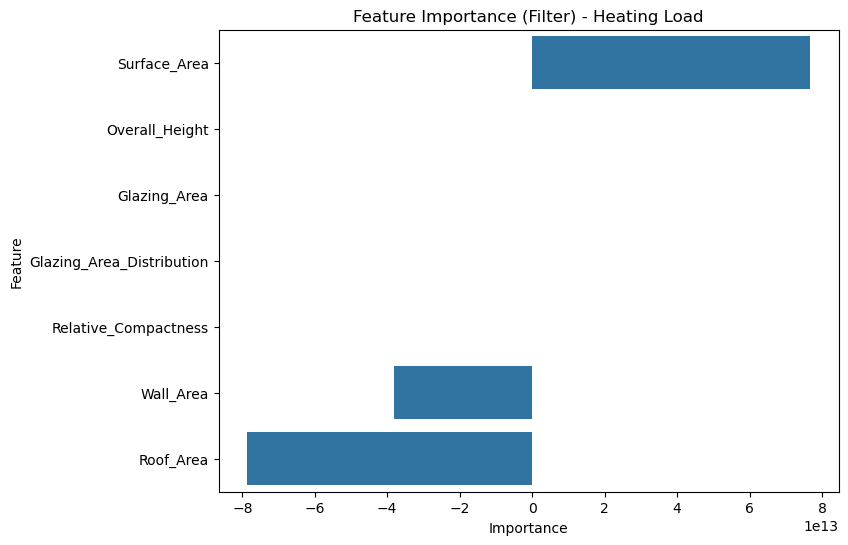


--- Filter Method (f_regression) for Cooling Load---
                     Feature  F-Statistic        p-value
4             Overall_Height  2461.732710  1.192704e-216
3                  Roof_Area  1813.972018  3.484661e-185
1               Surface_Area   526.356876   1.584169e-84
0       Relative_Compactness   429.442622   1.120130e-72
2                  Wall_Area   124.322868   2.061909e-26
6               Glazing_Area    28.982994   1.041864e-07
7  Glazing_Area_Distribution     1.046086   3.068143e-01
5                Orientation     0.047106   8.282501e-01

Selected Features for Cooling Load: ['Overall_Height', 'Roof_Area', 'Surface_Area', 'Relative_Compactness', 'Wall_Area', 'Glazing_Area']
Model with selected features R-squared: 0.8927, MSE: 9.9420, MAE: 2.2024


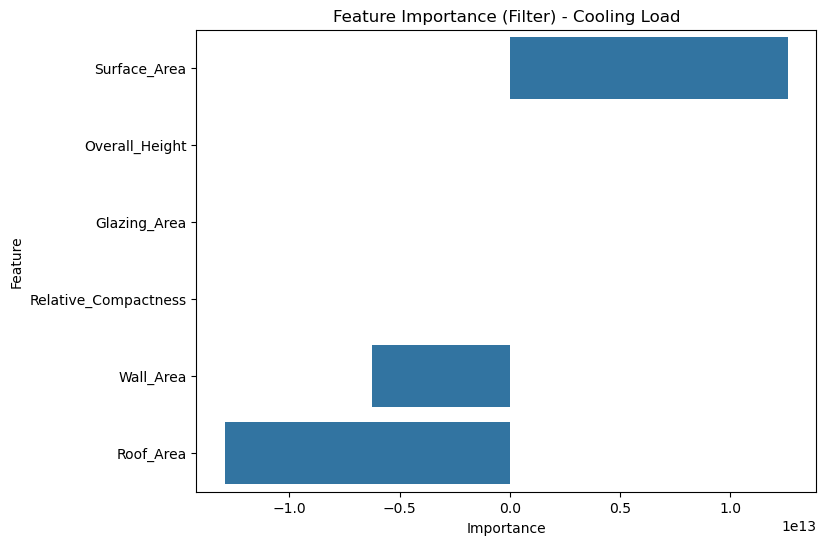


--- Wrapper Method (RFE) for Heating Load ---
Selected features: ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height']
Model with selected features R-squared: 0.8494, MSE: 15.7006, MAE: 2.9768


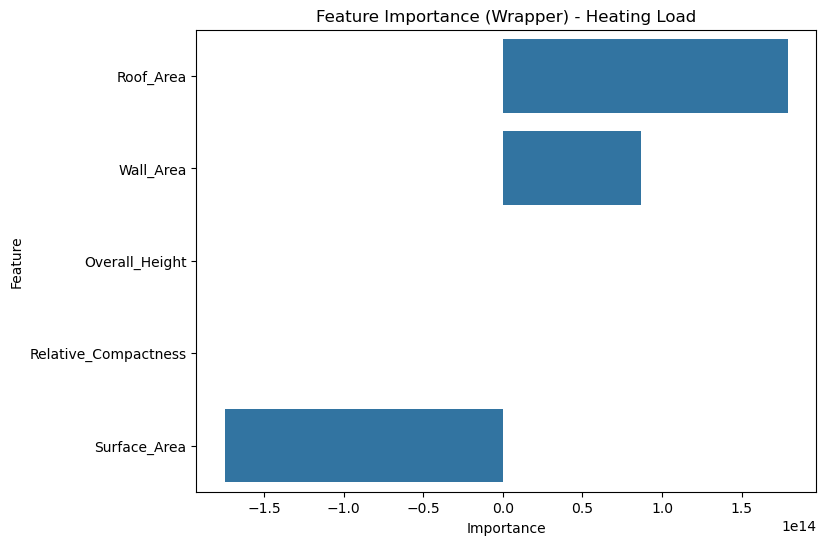


--- Wrapper Method (RFE) for Cooling Load ---
Selected features: ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height']
Model with selected features R-squared: 0.8539, MSE: 13.5365, MAE: 2.7623


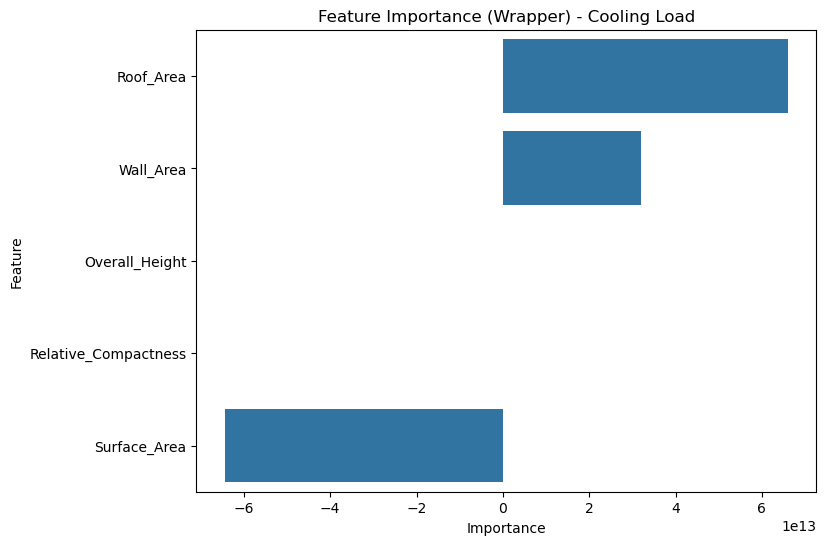


--- Embedded Method (LASSO) for Heating Load ---
Selected features: ['Overall_Height', 'Glazing_Area', 'Wall_Area', 'Glazing_Area_Distribution', 'Relative_Compactness']
Model with selected features R-squared: 0.9086, MSE: 9.5267, MAE: 2.3122


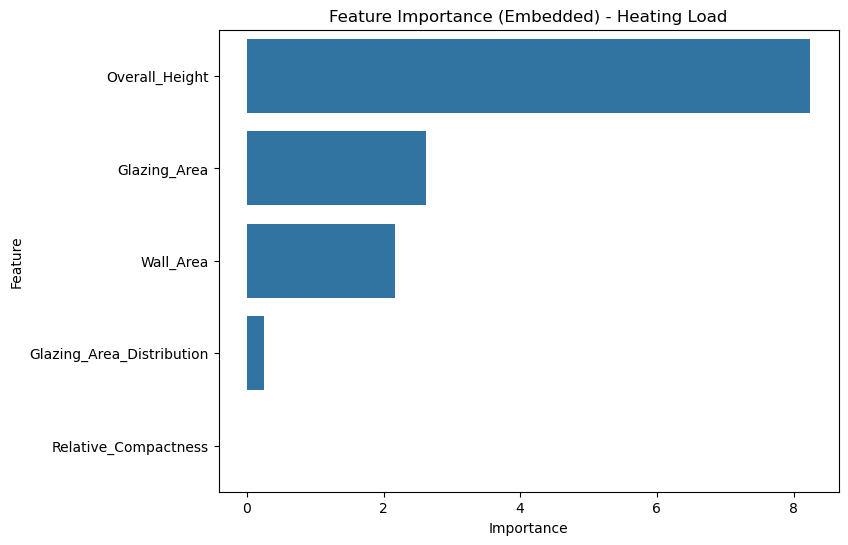


--- Embedded Method (LASSO) for Cooling Load ---
Selected features: ['Overall_Height', 'Glazing_Area', 'Wall_Area', 'Relative_Compactness']
Model with selected features R-squared: 0.8908, MSE: 10.1172, MAE: 2.2244


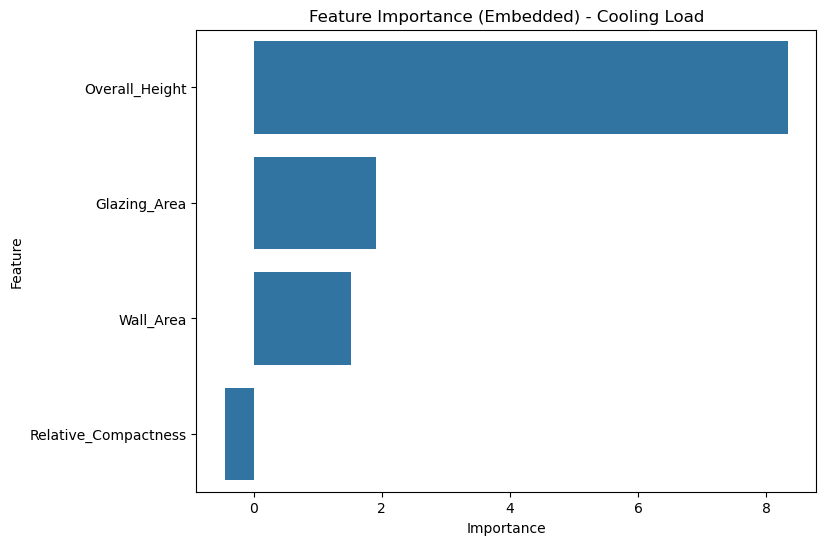

In [23]:
# --- 2. Feature Selection Techniques ---

def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  return r2, mse, mae


def feature_selection_filter(X_train, y_train, X_test, y_test, target_name):
    
    scores, pvalues = f_regression(X_train, y_train)
    feature_scores = pd.DataFrame({'Feature': X_train.columns,
                                   'F-Statistic': scores,
                                   'p-value': pvalues}).sort_values(by='F-Statistic', ascending=False)

    print(f"\n--- Filter Method (f_regression) for {target_name}---")
    print(feature_scores)
    
    best_features = feature_scores[feature_scores["p-value"] < 0.05]["Feature"].to_list()
    
    print(f"\nSelected Features for {target_name}: {best_features}")
    
    model = LinearRegression()
    model.fit(X_train[best_features], y_train)
    r2, mse, mae = evaluate_model(model, X_test[best_features], y_test)
    print(f'Model with selected features R-squared: {r2:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}')


    feature_importance = pd.DataFrame({'Feature': best_features,
                                        'Importance': model.coef_})

    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title(f'Feature Importance (Filter) - {target_name}')
    plt.show()
    return best_features
    
def feature_selection_wrapper(X_train, y_train, X_test, y_test, target_name):

    model_rfe = LinearRegression()
    rfe = RFE(estimator=model_rfe, n_features_to_select=5, step=1) # Select top 5 features for demonstration. Adjust as needed.
    rfe.fit(X_train, y_train)

    selected_features = X_train.columns[rfe.support_].tolist()
    print(f"\n--- Wrapper Method (RFE) for {target_name} ---")
    print(f"Selected features: {selected_features}")

    model = LinearRegression()
    model.fit(X_train[selected_features], y_train)
    r2, mse, mae = evaluate_model(model, X_test[selected_features], y_test)
    print(f'Model with selected features R-squared: {r2:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}')


    feature_importance = pd.DataFrame({'Feature': selected_features,
                                        'Importance': model.coef_})

    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title(f'Feature Importance (Wrapper) - {target_name}')
    plt.show()

    return selected_features


def feature_selection_embedded(X_train, y_train, X_test, y_test, target_name):
    model_lasso = Lasso(alpha=0.1) # Alpha can be tuned. Higher alpha reduces features
    model_lasso.fit(X_train, y_train)

    feature_importance = pd.DataFrame({'Feature': X_train.columns,
                                        'Importance': model_lasso.coef_})

    feature_importance = feature_importance[feature_importance['Importance'] != 0].sort_values(by='Importance', ascending=False)

    selected_features = feature_importance["Feature"].to_list()

    print(f"\n--- Embedded Method (LASSO) for {target_name} ---")
    print(f"Selected features: {selected_features}")

    model = LinearRegression()
    model.fit(X_train[selected_features], y_train)
    r2, mse, mae = evaluate_model(model, X_test[selected_features], y_test)
    print(f'Model with selected features R-squared: {r2:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}')

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title(f'Feature Importance (Embedded) - {target_name}')
    plt.show()
    return selected_features


#Perform Feature Selection
filter_heat = feature_selection_filter(X_train_heat, y_train_heat, X_test_heat, y_test_heat, "Heating Load")
filter_cool = feature_selection_filter(X_train_cool, y_train_cool, X_test_cool, y_test_cool, "Cooling Load")

wrapper_heat = feature_selection_wrapper(X_train_heat, y_train_heat, X_test_heat, y_test_heat, "Heating Load")
wrapper_cool = feature_selection_wrapper(X_train_cool, y_train_cool, X_test_cool, y_test_cool, "Cooling Load")

embedded_heat = feature_selection_embedded(X_train_heat, y_train_heat, X_test_heat, y_test_heat, "Heating Load")
embedded_cool = feature_selection_embedded(X_train_cool, y_train_cool, X_test_cool, y_test_cool, "Cooling Load")

In [25]:
# --- 3. Model Building ---
print("\n--- Model Building ---")

def model_build_all(X_train, y_train, X_test, y_test, target_name):
    model = LinearRegression()
    model.fit(X_train, y_train)
    r2, mse, mae = evaluate_model(model, X_test, y_test)
    print(f'Model (all features) for {target_name} R-squared: {r2:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}')



--- Model Building ---


In [27]:
# Function to build model with selected features

def model_build_selected(X_train, X_test, y_train, y_test, selected_features, model_name, target_name):
   
    model = LinearRegression()
    model.fit(X_train[selected_features], y_train)
    r2, mse, mae = evaluate_model(model, X_test[selected_features], y_test)
    print(f"Model ({model_name})  for {target_name} R-squared: {r2:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}")



# Building models for Heating Load
print("\n--- Heating Load Models ---")
model_build_all(X_train_heat, y_train_heat, X_test_heat, y_test_heat, "Heating Load")
model_build_selected(X_train_heat, X_test_heat, y_train_heat, y_test_heat, filter_heat, "Filter", "Heating Load")
model_build_selected(X_train_heat, X_test_heat, y_train_heat, y_test_heat, wrapper_heat, "Wrapper", "Heating Load")
model_build_selected(X_train_heat, X_test_heat, y_train_heat, y_test_heat, embedded_heat, "Embedded", "Heating Load")


# Building models for Cooling Load
print("\n--- Cooling Load Models ---")
model_build_all(X_train_cool, y_train_cool, X_test_cool, y_test_cool, "Cooling Load")
model_build_selected(X_train_cool, X_test_cool, y_train_cool, y_test_cool, filter_cool, "Filter", "Cooling Load")
model_build_selected(X_train_cool, X_test_cool, y_train_cool, y_test_cool, wrapper_cool, "Wrapper", "Cooling Load")
model_build_selected(X_train_cool, X_test_cool, y_train_cool, y_test_cool, embedded_cool, "Embedded", "Cooling Load")


--- Heating Load Models ---
Model (all features) for Heating Load R-squared: 0.9119, MSE: 9.1809, MAE: 2.1792
Model (Filter)  for Heating Load R-squared: 0.9123, MSE: 9.1391, MAE: 2.2060
Model (Wrapper)  for Heating Load R-squared: 0.8494, MSE: 15.7006, MAE: 2.9768
Model (Embedded)  for Heating Load R-squared: 0.9086, MSE: 9.5267, MAE: 2.3122

--- Cooling Load Models ---
Model (all features) for Cooling Load R-squared: 0.8933, MSE: 9.8847, MAE: 2.1897
Model (Filter)  for Cooling Load R-squared: 0.8927, MSE: 9.9420, MAE: 2.2024
Model (Wrapper)  for Cooling Load R-squared: 0.8539, MSE: 13.5365, MAE: 2.7623
Model (Embedded)  for Cooling Load R-squared: 0.8908, MSE: 10.1172, MAE: 2.2244


In [29]:
# --- 4. Analysis ---
print("\n--- Analysis ---")

print(f"\nFeatures selected by Filter Method (Heating Load): {filter_heat}")
print(f"\nFeatures selected by Filter Method (Cooling Load): {filter_cool}")
print(f"\nFeatures selected by Wrapper Method (Heating Load): {wrapper_heat}")
print(f"\nFeatures selected by Wrapper Method (Cooling Load): {wrapper_cool}")
print(f"\nFeatures selected by Embedded Method (Heating Load): {embedded_heat}")
print(f"\nFeatures selected by Embedded Method (Cooling Load): {embedded_cool}")



--- Analysis ---

Features selected by Filter Method (Heating Load): ['Overall_Height', 'Roof_Area', 'Surface_Area', 'Relative_Compactness', 'Wall_Area', 'Glazing_Area', 'Glazing_Area_Distribution']

Features selected by Filter Method (Cooling Load): ['Overall_Height', 'Roof_Area', 'Surface_Area', 'Relative_Compactness', 'Wall_Area', 'Glazing_Area']

Features selected by Wrapper Method (Heating Load): ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height']

Features selected by Wrapper Method (Cooling Load): ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height']

Features selected by Embedded Method (Heating Load): ['Overall_Height', 'Glazing_Area', 'Wall_Area', 'Glazing_Area_Distribution', 'Relative_Compactness']

Features selected by Embedded Method (Cooling Load): ['Overall_Height', 'Glazing_Area', 'Wall_Area', 'Relative_Compactness']


In [35]:

print("\nModel Performance Summary:")
print("------------------------")

print("\nHeating Load Models")
print("Model (all features) - R-squared: 0.9119, MSE: 9.1809, MAE: 2.1792")
print("Model (Filter)       - R-squared: 0.9123, MSE: 9.1391, MAE: 2.2060")
print("Model (Wrapper)      - R-squared: 0.8494, MSE: 15.7006, MAE: 2.9768")
print("Model (Embedded)     - R-squared: 0.9086, MSE: 9.5267, MAE: 2.3122")

print("\nCooling Load Models")
print("Model (all features) - R-squared: 0.8933, MSE: 9.8847, MAE: 2.1897")
print("Model (Filter)       - R-squared: 0.8927, MSE: 9.9420, MAE: 2.2024")
print("Model (Wrapper)      - R-squared: 0.8539, MSE: 13.5365, MAE: 2.7623")
print("Model (Embedded)     - R-squared: 0.8908, MSE: 10.1172, MAE: 2.2244")



Model Performance Summary:
------------------------

Heating Load Models
Model (all features) - R-squared: 0.9119, MSE: 9.1809, MAE: 2.1792
Model (Filter)       - R-squared: 0.9123, MSE: 9.1391, MAE: 2.2060
Model (Wrapper)      - R-squared: 0.8494, MSE: 15.7006, MAE: 2.9768
Model (Embedded)     - R-squared: 0.9086, MSE: 9.5267, MAE: 2.3122

Cooling Load Models
Model (all features) - R-squared: 0.8933, MSE: 9.8847, MAE: 2.1897
Model (Filter)       - R-squared: 0.8927, MSE: 9.9420, MAE: 2.2024
Model (Wrapper)      - R-squared: 0.8539, MSE: 13.5365, MAE: 2.7623
Model (Embedded)     - R-squared: 0.8908, MSE: 10.1172, MAE: 2.2244


The features selected by each method often overlap, indicating their importance in predicting the target variables. For example,  'Overall_Height' is consistently present. The models using all features has the best performance.
The Filter method selects features based on statistical tests.  Wrapper method searches the best feature set using search algorithms, embedded method selects best feature set using regularization.
In this specific case, using all features or using filter method had the best performance. However, using filter method, we reduce computational cost while keeping same accuracy.
The choice of technique depends on the dataset. Wrapper methods are computationally more expensive than Filter methods.  Embedded methods can be used to overcome limitations of filter and wrapper methods.